# Personality Test

The Prediction is based on five factors:

* Openness to some new experience
* Conscientiousness
* Extroversion 
* Agreeableness 
* Neuroticism 

The scale was labeled between 1=Disagree, 3=Neutral, 5=Agree.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


## Loading the Data Set

In [2]:
data = pd.read_csv('data-final.csv', sep='\t')

pd.options.display.max_columns = 150

data.drop(data.columns[50:107], axis=1, inplace=True)
data.drop(data.columns[51:], axis=1, inplace=True)

print('Number of participants: ', len(data))
data.head()

Number of participants:  1015341


,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,country
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,GB
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,MY
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,GB
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,GB
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0,KE


## Understanding the Data Set

In [3]:
print('Is there any missing value? ', data.isnull().values.any())
print('How many missing values? ', data.isnull().values.sum())
data.dropna(inplace=True)
print('Number of participants after eliminating missing values: ', len(data))

Is there any missing value?  True
How many missing values?  89227
Number of participants after eliminating missing values:  1013481


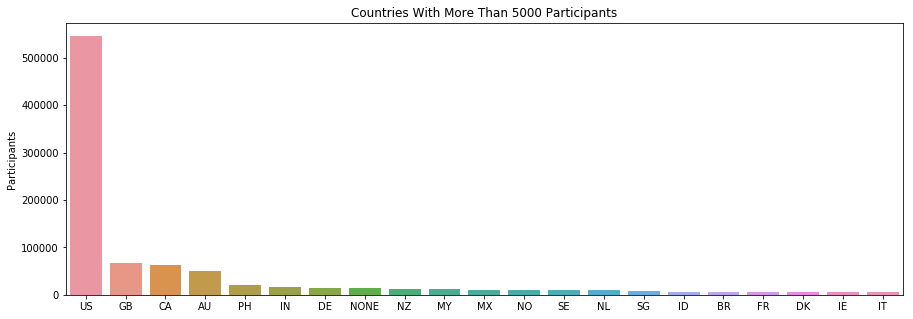

In [4]:
# Participants' nationality distriution
countries = pd.DataFrame(data['country'].value_counts())
countries_5000 = countries[countries['country'] >= 5000]
plt.figure(figsize=(15,5))
sns.barplot(data=countries_5000, x=countries_5000.index, y='country')
plt.title('Countries With More Than 5000 Participants')
plt.ylabel('Participants');

In [5]:
# Groups and Questions
ext_questions = {'EXT1' : 'I am the life of the party',
                 'EXT2' : 'I dont talk a lot',
                 'EXT3' : 'I feel comfortable around people',
                 'EXT4' : 'I keep in the background',
                 'EXT5' : 'I start conversations',
                 'EXT6' : 'I have little to say',
                 'EXT7' : 'I talk to a lot of different people at parties',
                 'EXT8' : 'I dont like to draw attention to myself',
                 'EXT9' : 'I dont mind being the center of attention',
                 'EXT10': 'I am quiet around strangers'}

est_questions = {'EST1' : 'I get stressed out easily',
                 'EST2' : 'I am relaxed most of the time',
                 'EST3' : 'I worry about things',
                 'EST4' : 'I seldom feel blue',
                 'EST5' : 'I am easily disturbed',
                 'EST6' : 'I get upset easily',
                 'EST7' : 'I change my mood a lot',
                 'EST8' : 'I have frequent mood swings',
                 'EST9' : 'I get irritated easily',
                 'EST10': 'I often feel blue'}

agr_questions = {'AGR1' : 'I feel little concern for others',
                 'AGR2' : 'I am interested in people',
                 'AGR3' : 'I insult people',
                 'AGR4' : 'I sympathize with others feelings',
                 'AGR5' : 'I am not interested in other peoples problems',
                 'AGR6' : 'I have a soft heart',
                 'AGR7' : 'I am not really interested in others',
                 'AGR8' : 'I take time out for others',
                 'AGR9' : 'I feel others emotions',
                 'AGR10': 'I make people feel at ease'}

csn_questions = {'CSN1' : 'I am always prepared',
                 'CSN2' : 'I leave my belongings around',
                 'CSN3' : 'I pay attention to details',
                 'CSN4' : 'I make a mess of things',
                 'CSN5' : 'I get chores done right away',
                 'CSN6' : 'I often forget to put things back in their proper place',
                 'CSN7' : 'I like order',
                 'CSN8' : 'I shirk my duties',
                 'CSN9' : 'I follow a schedule',
                 'CSN10' : 'I am exacting in my work'}

opn_questions = {'OPN1' : 'I have a rich vocabulary',
                 'OPN2' : 'I have difficulty understanding abstract ideas',
                 'OPN3' : 'I have a vivid imagination',
                 'OPN4' : 'I am not interested in abstract ideas',
                 'OPN5' : 'I have excellent ideas',
                 'OPN6' : 'I do not have a good imagination',
                 'OPN7' : 'I am quick to understand things',
                 'OPN8' : 'I use difficult words',
                 'OPN9' : 'I spend time reflecting on things',
                 'OPN10': 'I am full of ideas'}

# Group Names and Columns
EXT = [column for column in data if column.startswith('EXT')]
EST = [column for column in data if column.startswith('EST')]
AGR = [column for column in data if column.startswith('AGR')]
CSN = [column for column in data if column.startswith('CSN')]
OPN = [column for column in data if column.startswith('OPN')]

In [6]:
# Defining a function to visualize the questions and answers distribution
def vis_questions(groupname, questions, color):
    plt.figure(figsize=(40,50))
    for i in range(1, 11):
        plt.subplot(10,2,i)
        plt.hist(data[groupname[i-1]], bins=14, color= color, alpha=.5)
        plt.title(questions[groupname[i-1]], fontsize=18)

Q&As Related to Extroversion Personality


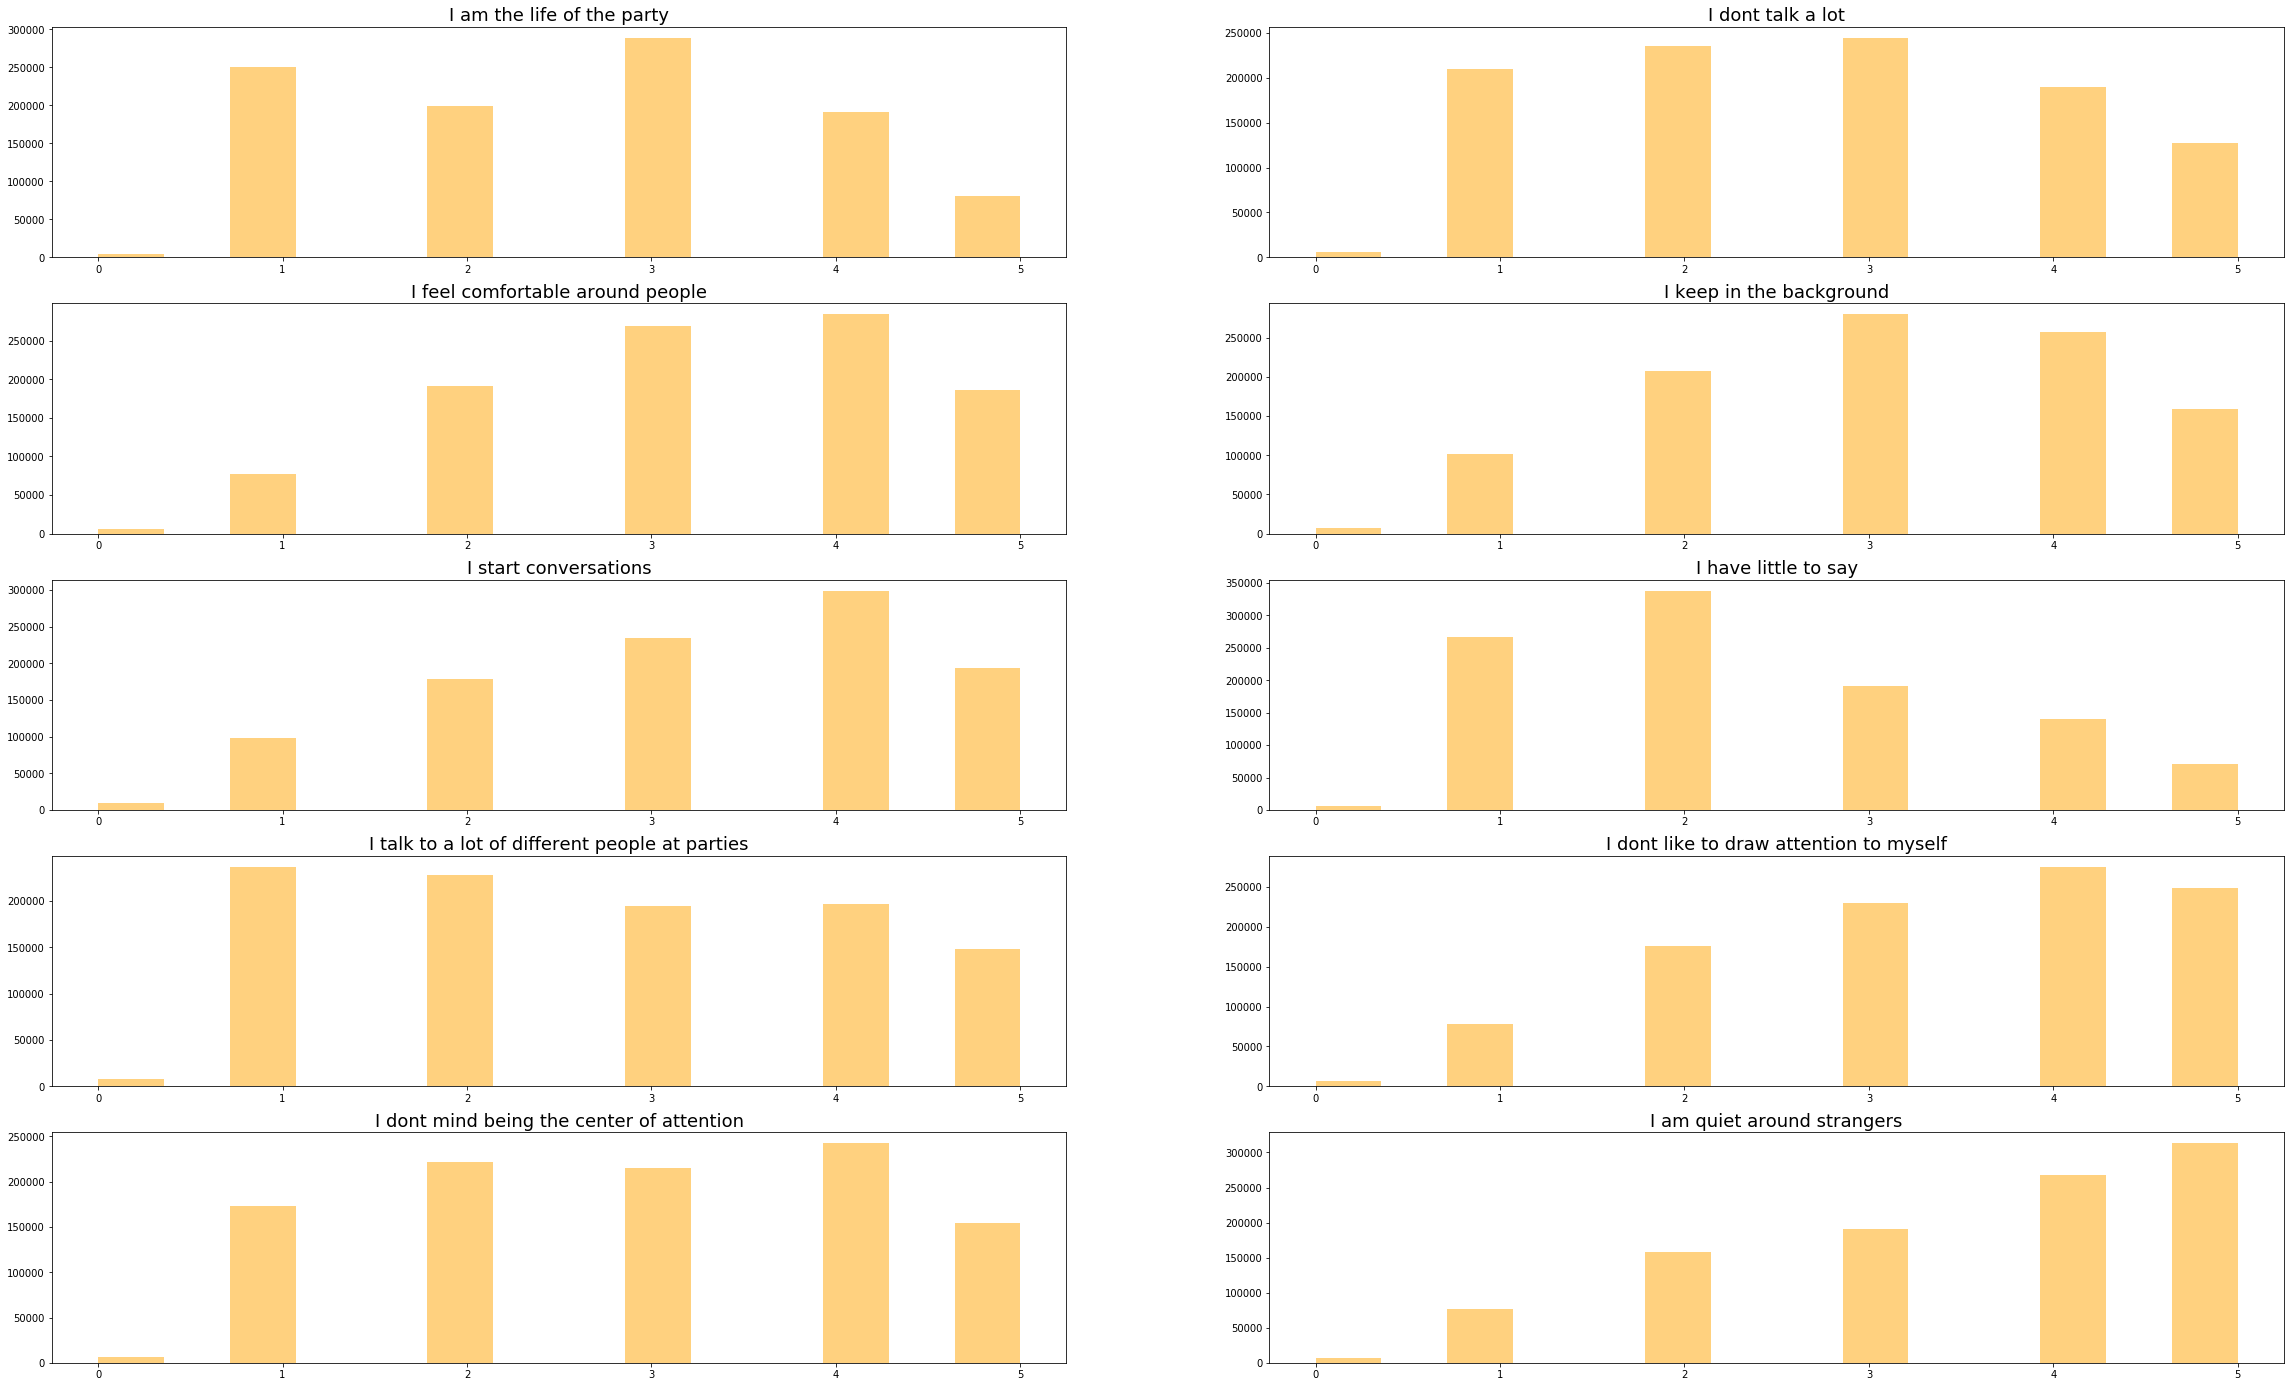

In [7]:
print('Q&As Related to Extroversion Personality')
vis_questions(EXT, ext_questions, 'orange')

Q&As Related to Neuroticism Personality


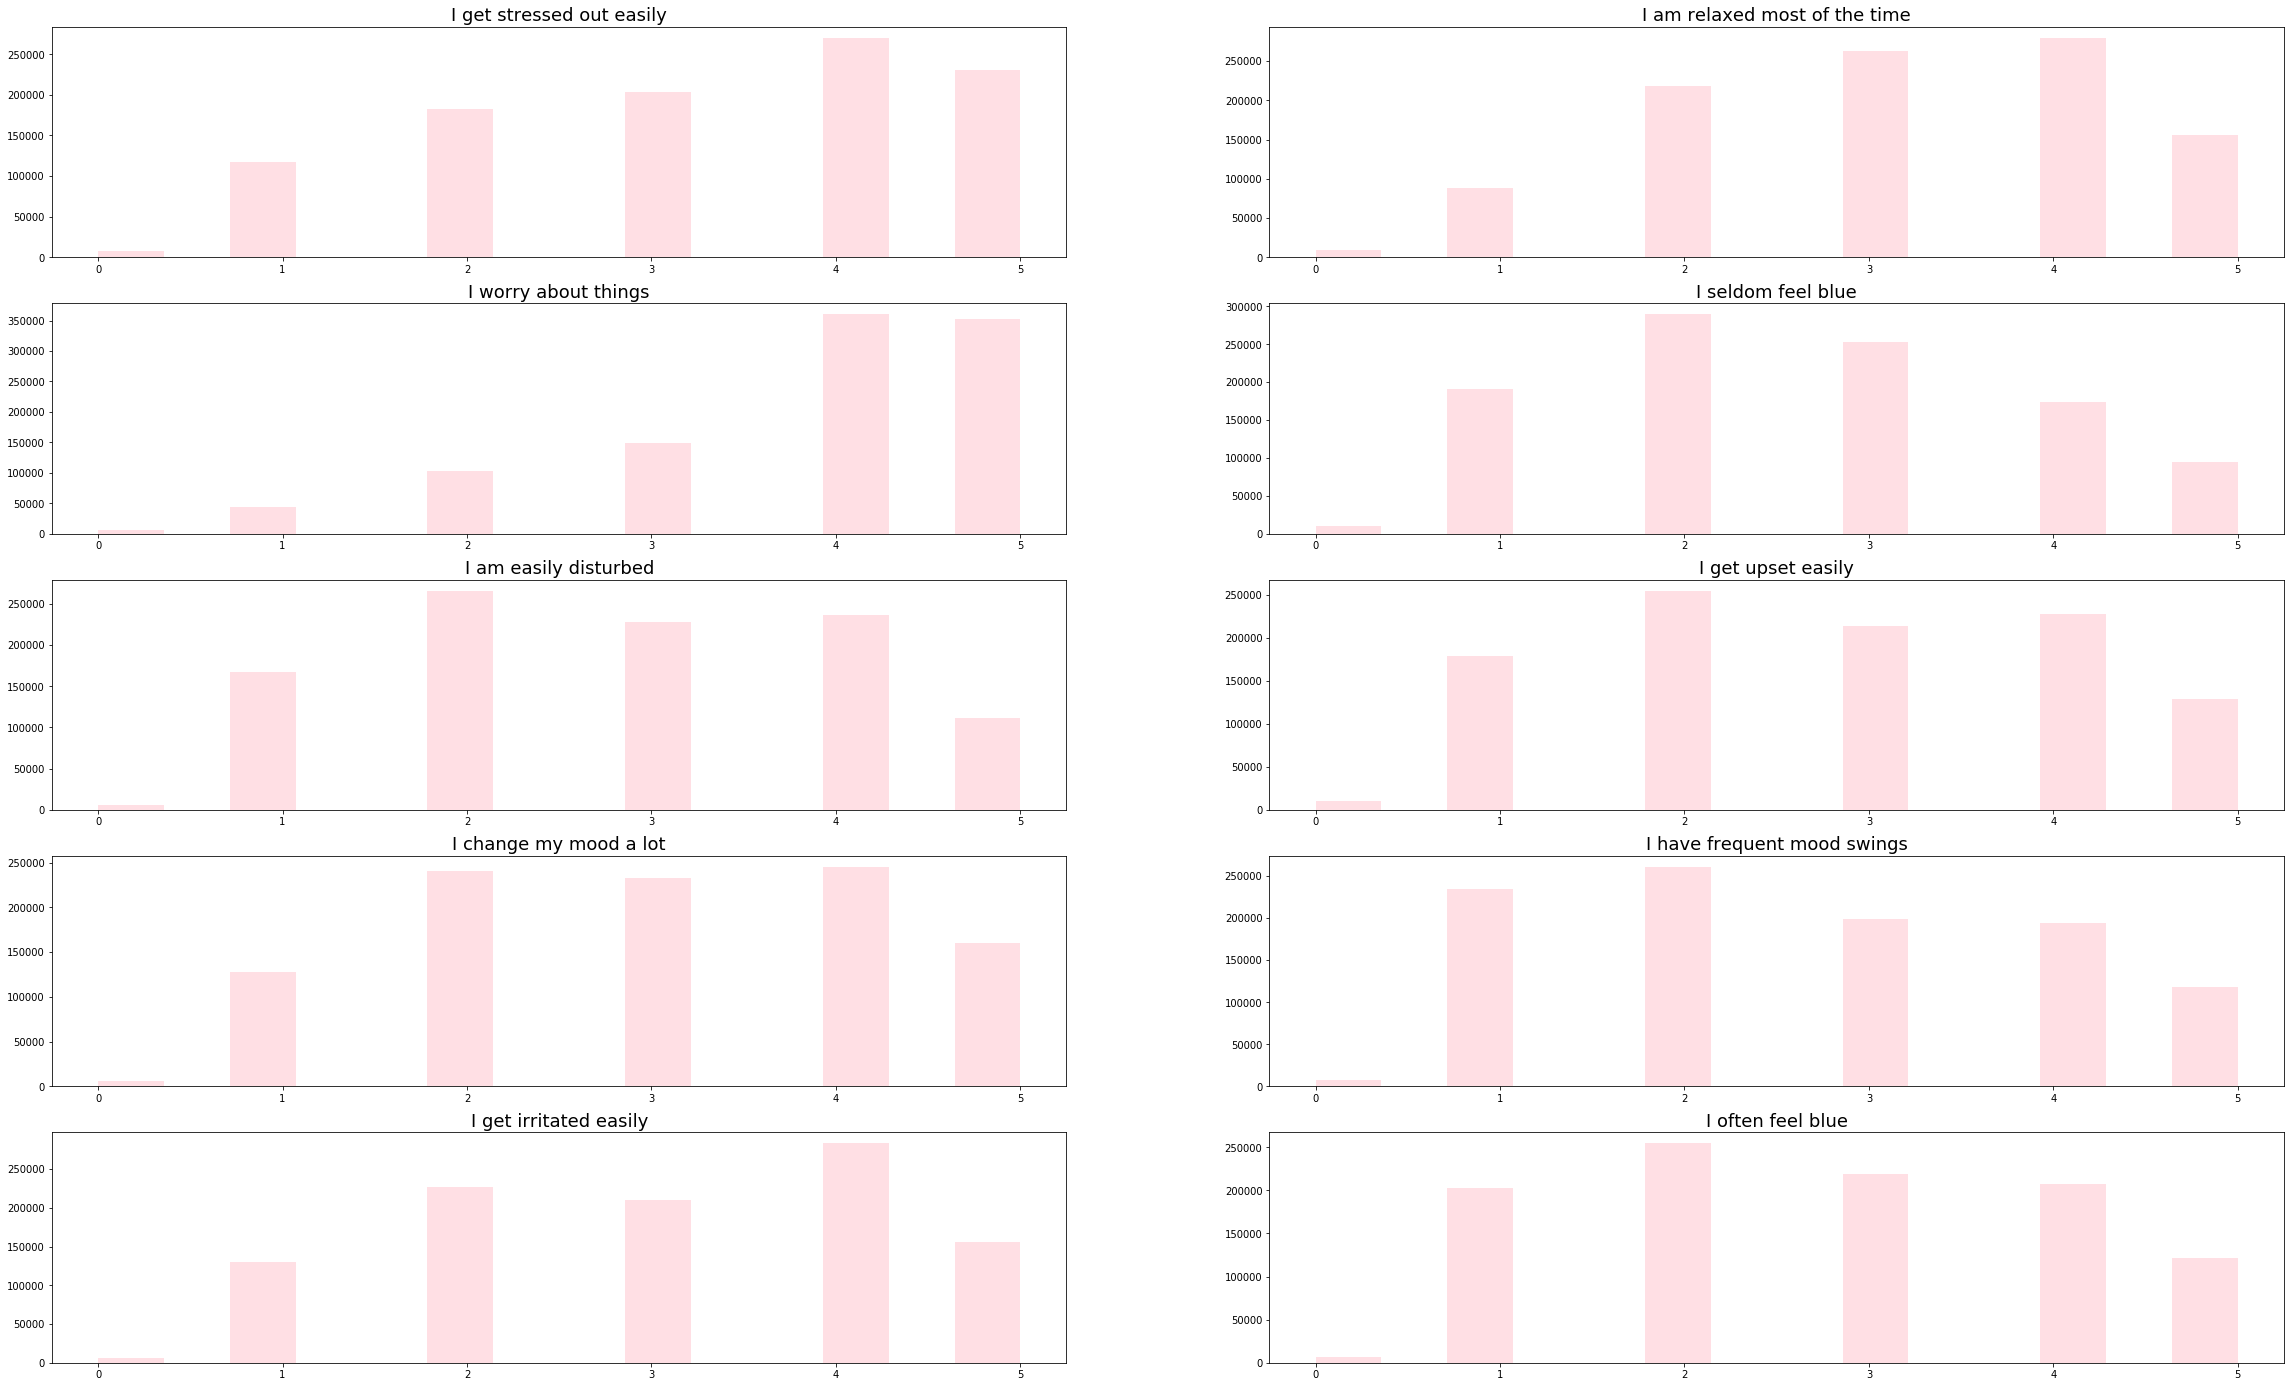

In [8]:
print('Q&As Related to Neuroticism Personality')
vis_questions(EST, est_questions, 'pink')

Q&As Related to Agreeable Personality


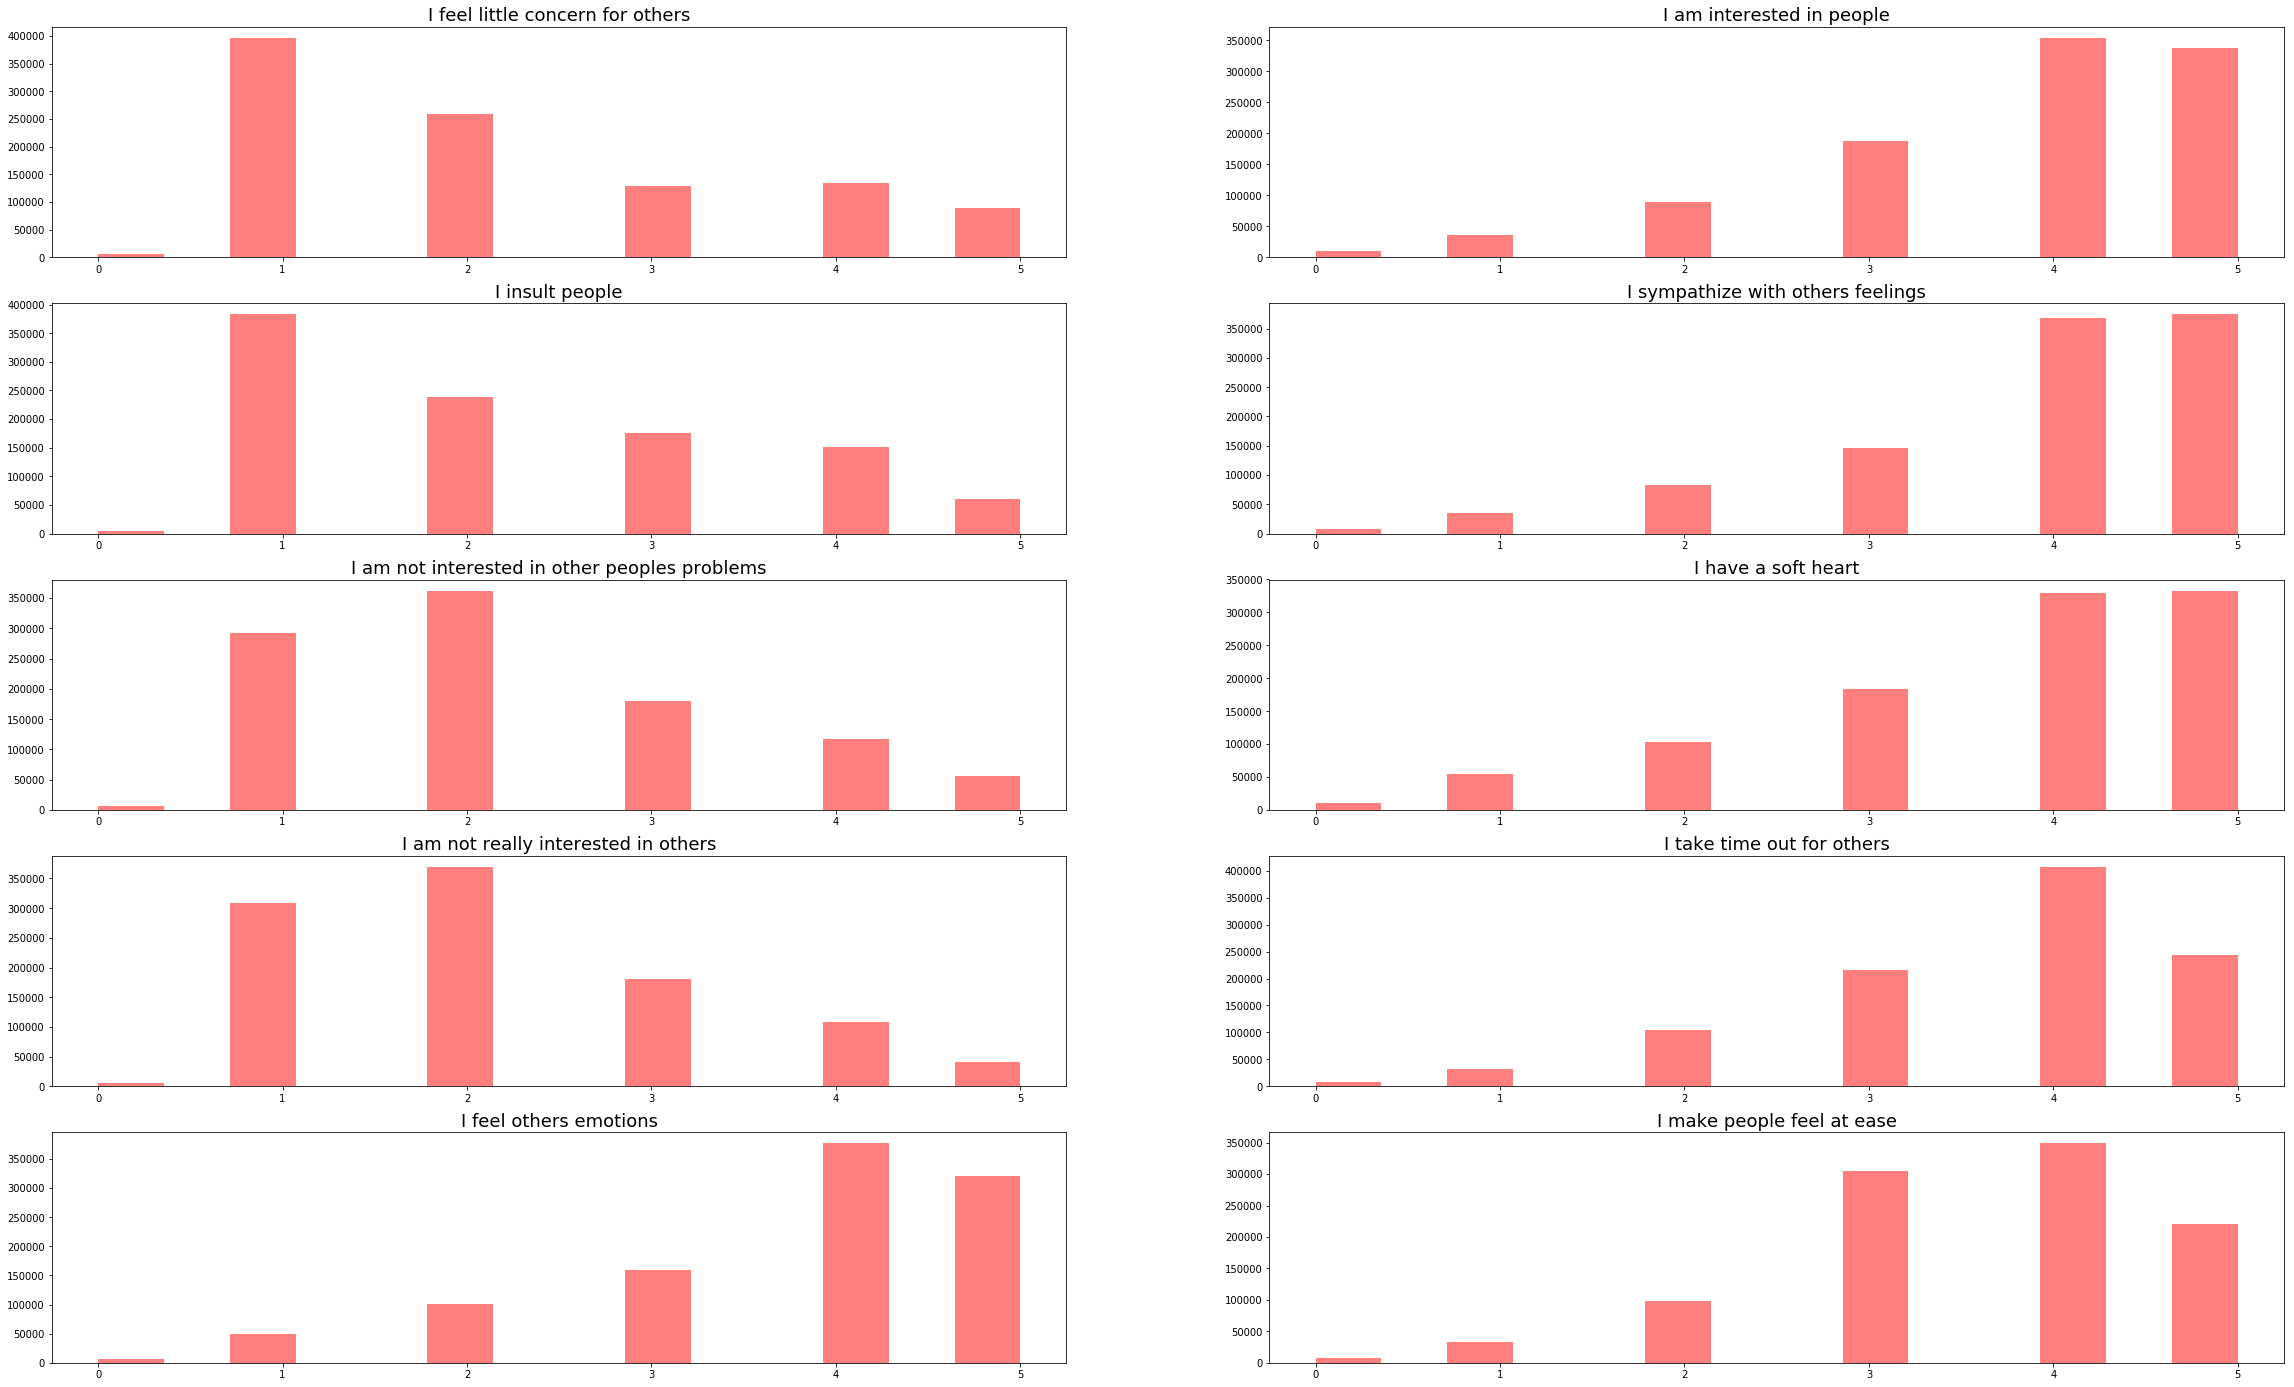

In [9]:
print('Q&As Related to Agreeable Personality')
vis_questions(AGR, agr_questions, 'red')

Q&As Related to Conscientious Personality


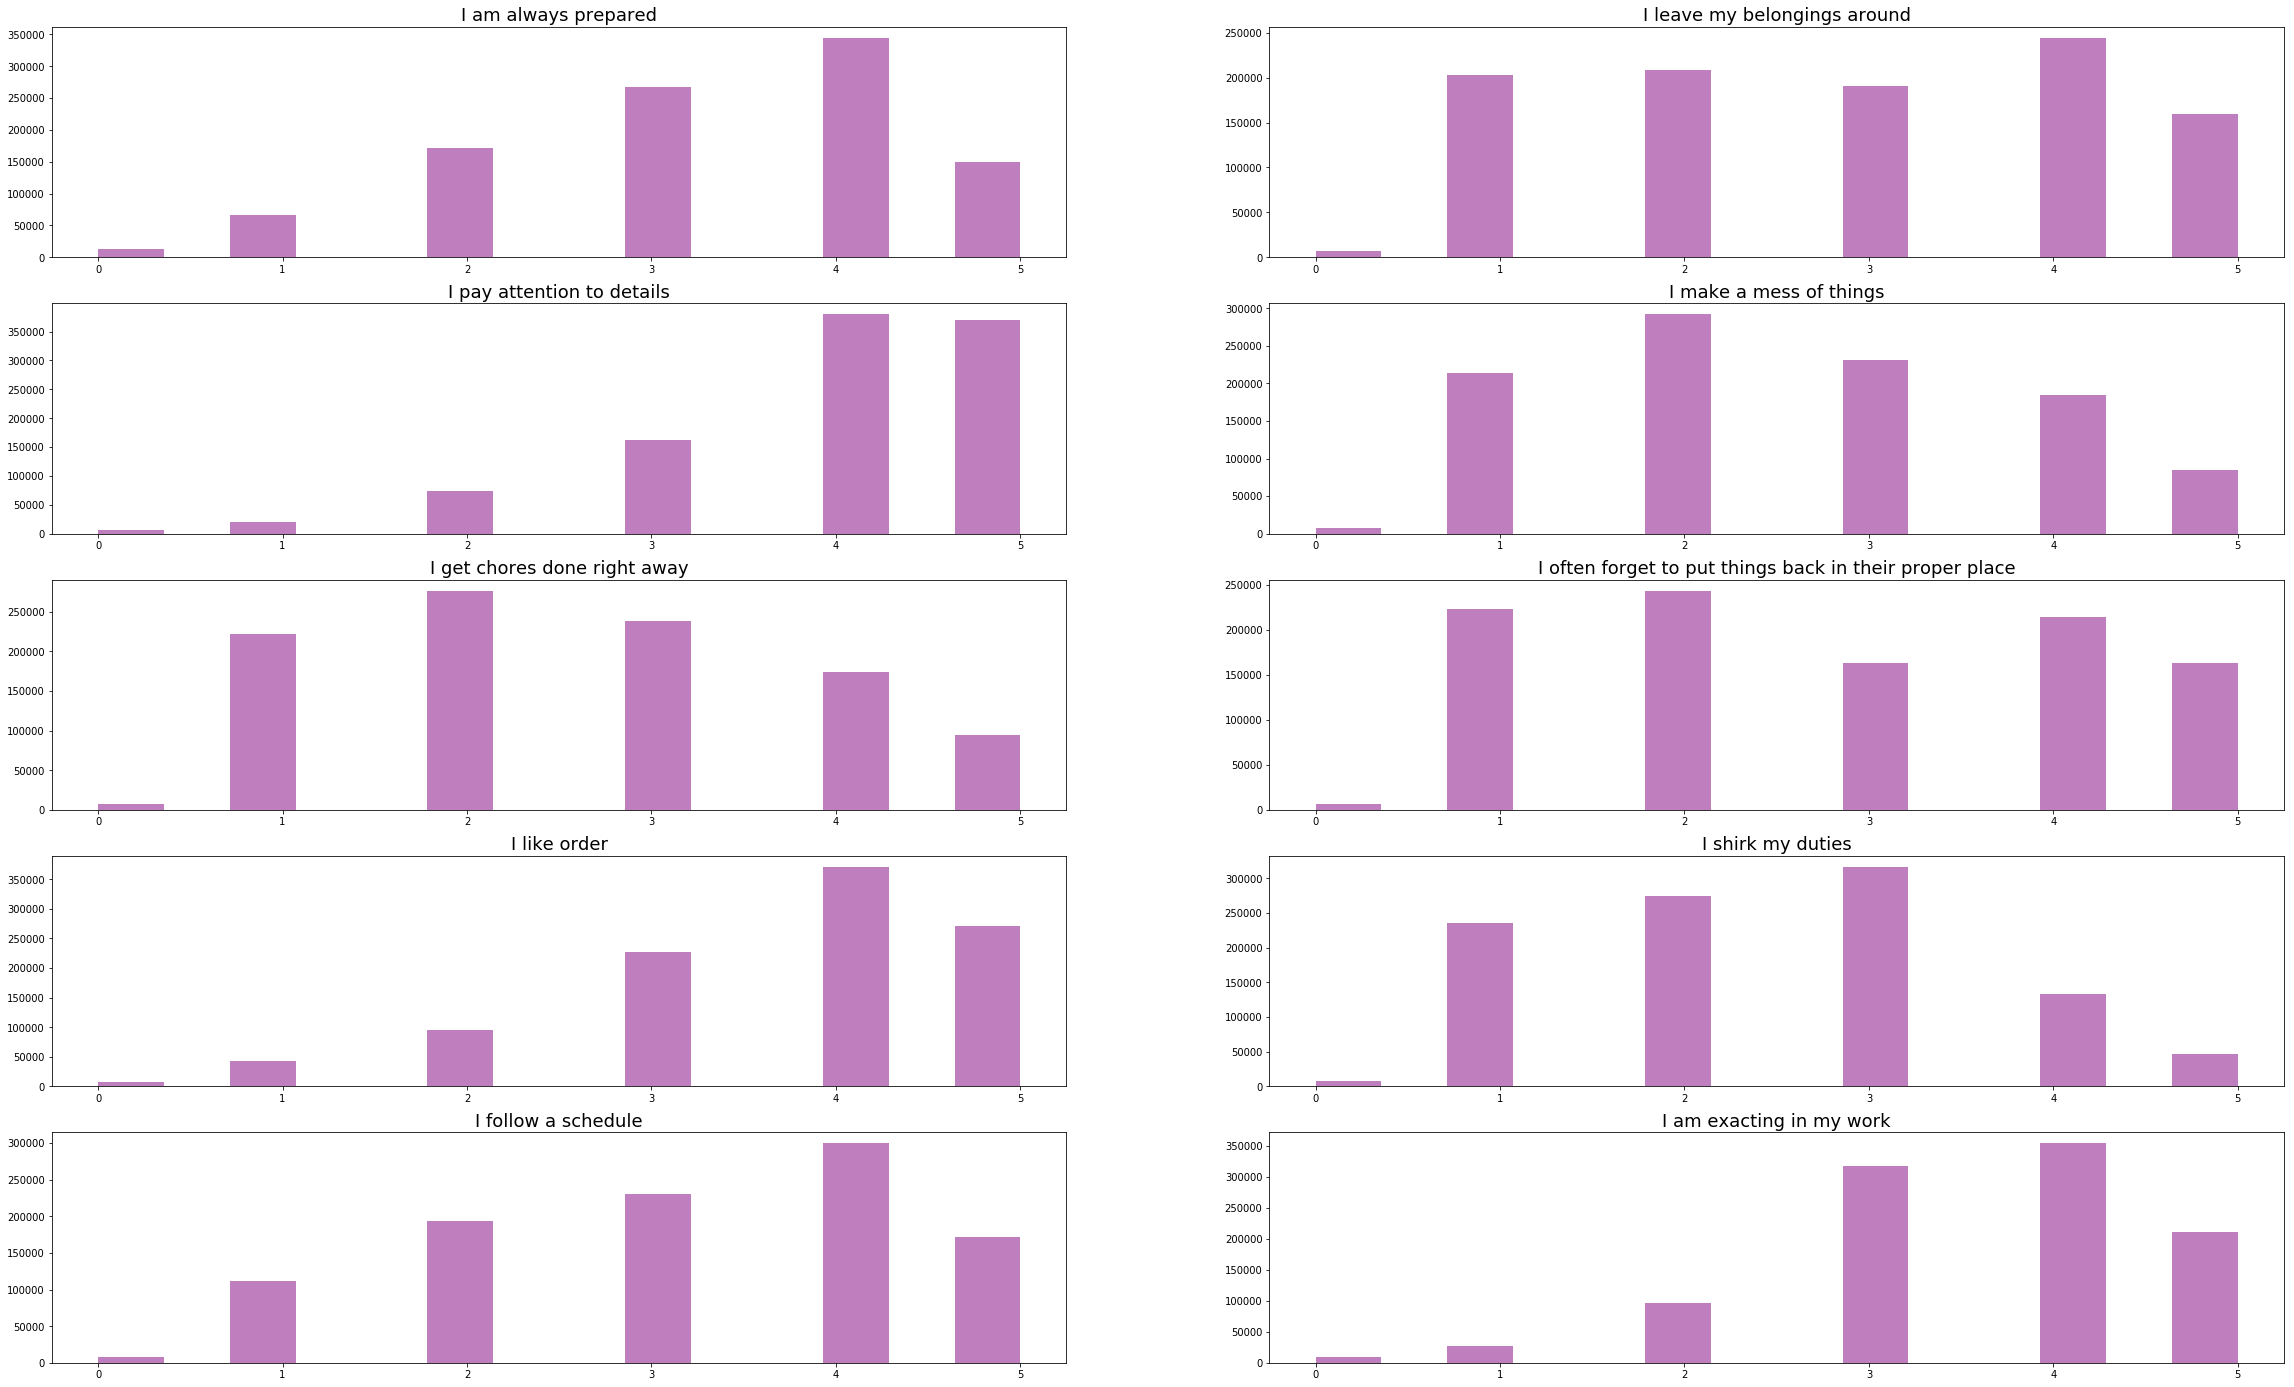

In [10]:
print('Q&As Related to Conscientious Personality')
vis_questions(CSN, csn_questions, 'purple')

Q&As Related to Open Personality


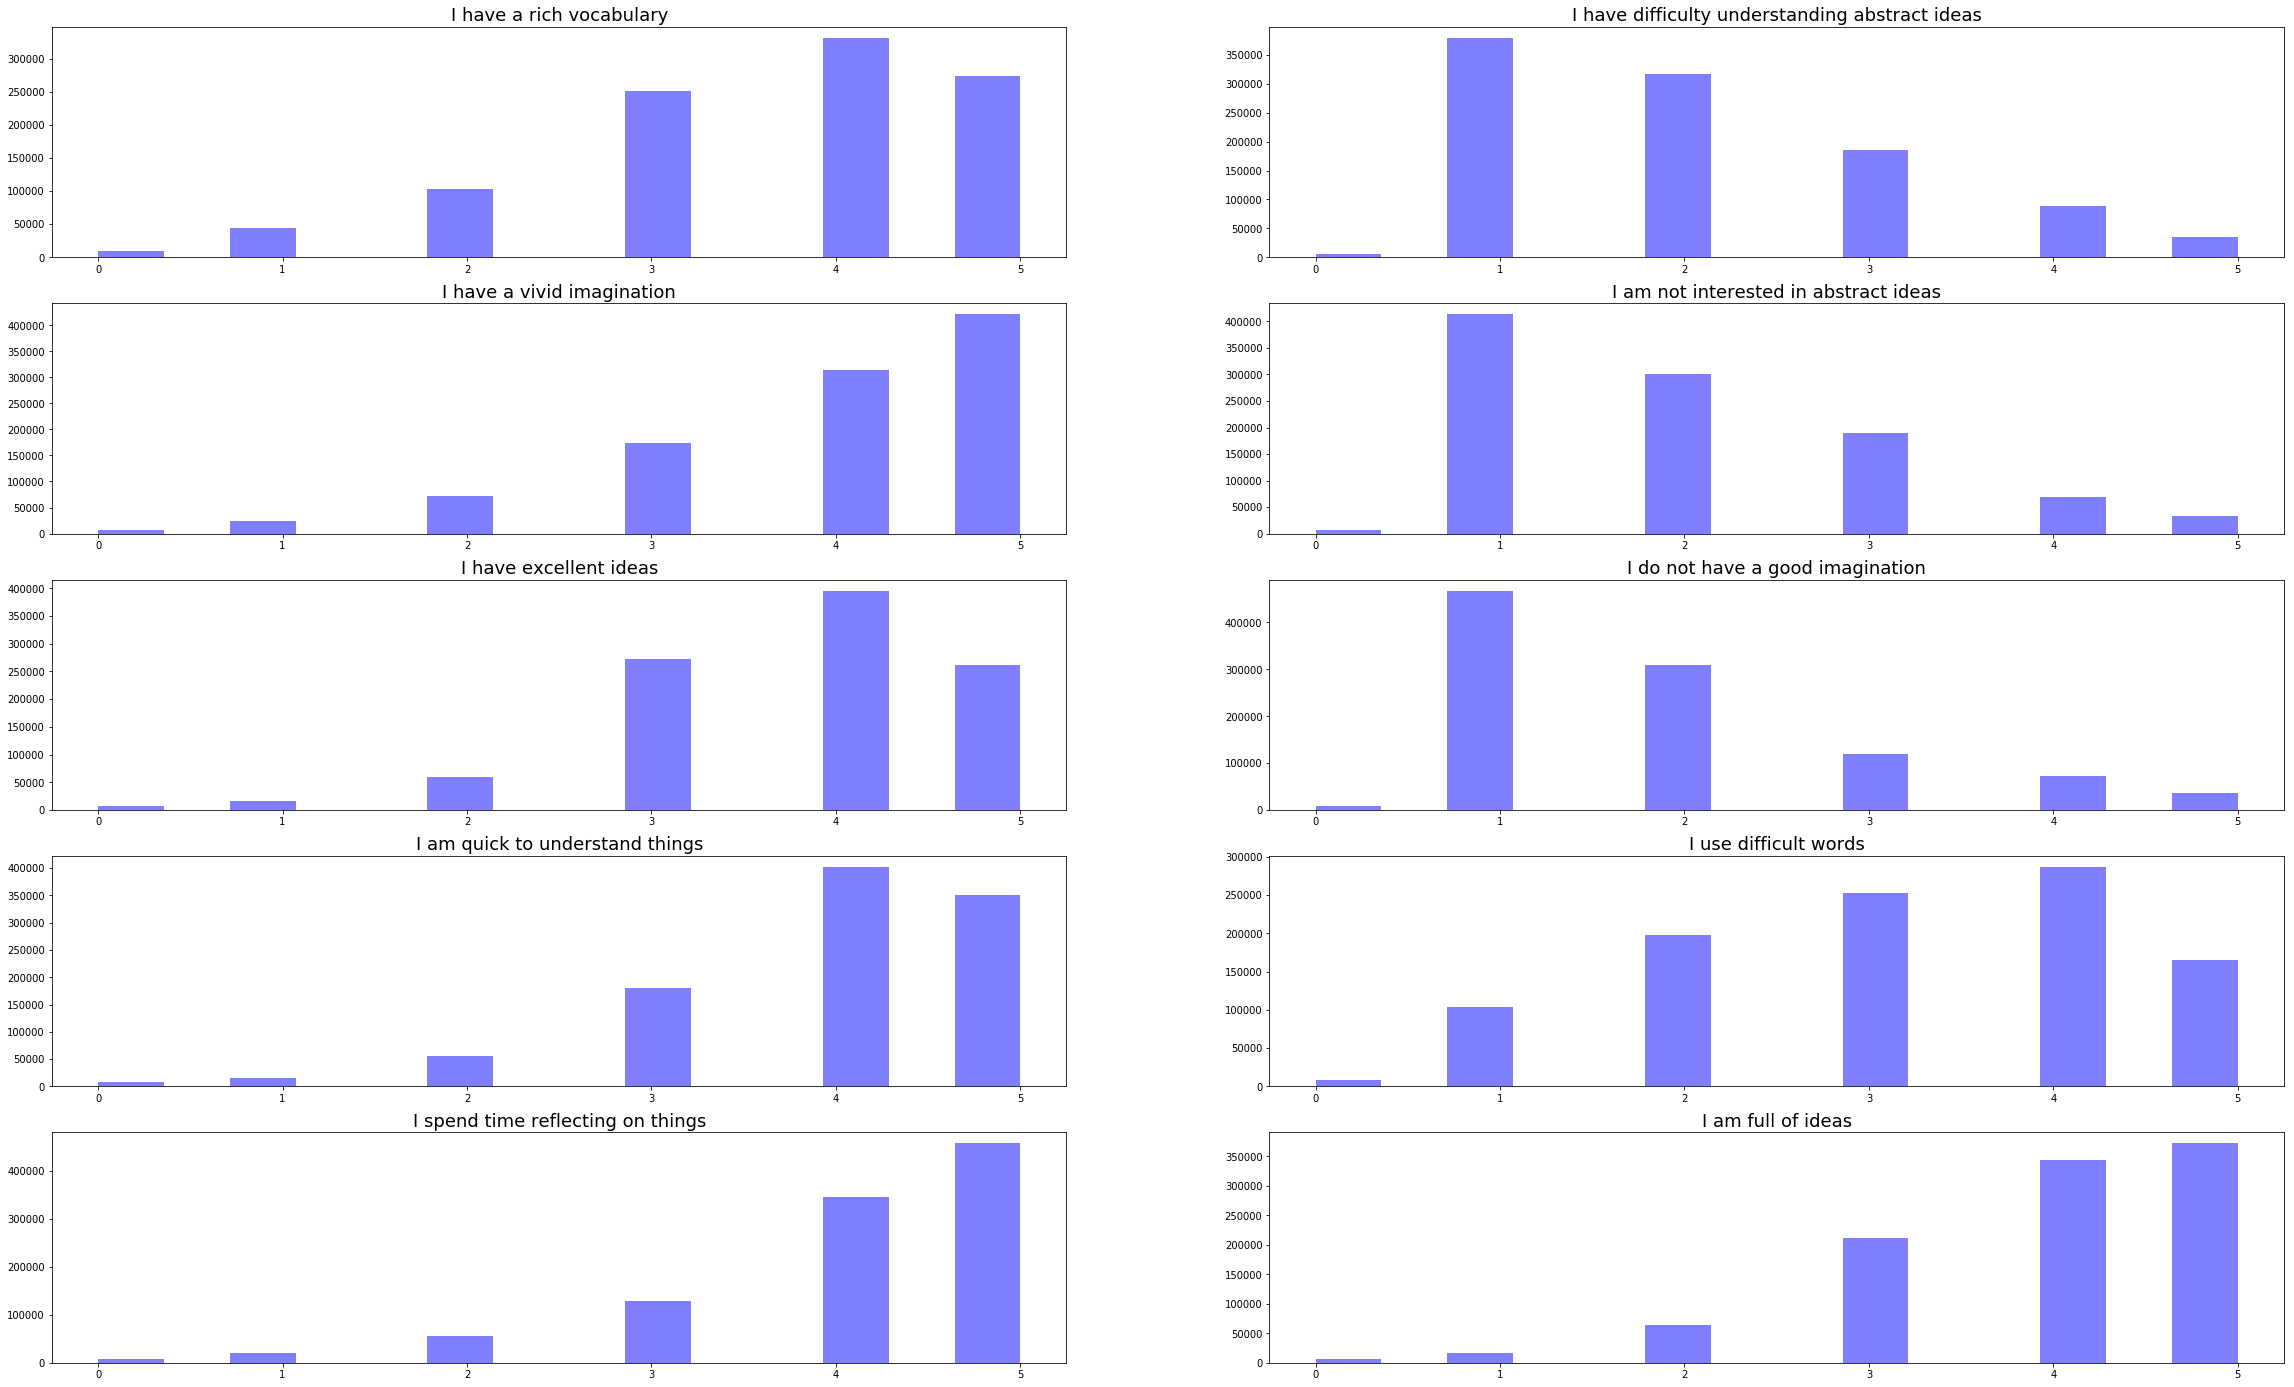

In [11]:
print('Q&As Related to Open Personality')
vis_questions(OPN, opn_questions, 'blue')

## How many clusters to define?

In [12]:
# For ease of calculation lets scale all the values between 0-1 and take a sample of 5000 
from sklearn.preprocessing import MinMaxScaler

df = data.drop('country', axis=1)
columns = list(df.columns)

scaler = MinMaxScaler(feature_range=(0,1))
# Values converted to array
df = scaler.fit_transform(df)
#Values again converted to dataframe
df = pd.DataFrame(df, columns=columns)
df_sample1 = df[:5000]


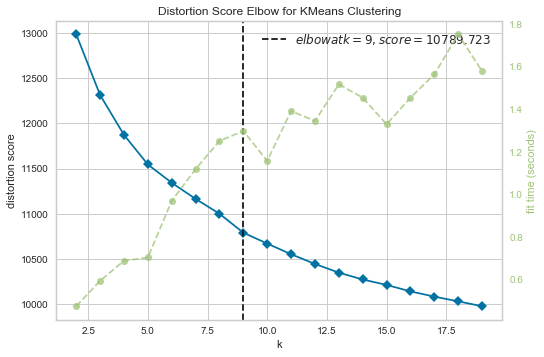

In [13]:
# Visualize the elbow
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,20))
visualizer.fit(df_sample1)
visualizer.poof()

As you can see 5 clusters looks optimum for the data set and we already know this researh is to identify 5 different personalities.

## Clustering Participants into 5 Personality Groups

In [14]:
# Creating K-means Cluster Model
from sklearn.cluster import KMeans

# I use the unscaled data but without the country column
df_model1= data.drop('country', axis=1)

# I define 5 clusters and fit my model
kmeans = KMeans(n_clusters=5)
k_fit = kmeans.fit(df_model1)

In [15]:
# Predicting the Clusters
pd.options.display.max_columns = 10
predictions = k_fit.labels_
df_model1['Clusters'] = predictions
df_model1.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,...,OPN7,OPN8,OPN9,OPN10,Clusters
0,4.0,1.0,5.0,2.0,5.0,...,5.0,3.0,4.0,5.0,2
1,3.0,5.0,3.0,4.0,3.0,...,4.0,2.0,5.0,3.0,3
2,2.0,3.0,4.0,4.0,3.0,...,5.0,3.0,4.0,4.0,3
3,2.0,2.0,2.0,3.0,4.0,...,4.0,4.0,3.0,3.0,0
4,3.0,3.0,3.0,3.0,5.0,...,5.0,3.0,5.0,5.0,2


## Analysing the Model and Predictions

How many individual do we have for each cluster?

In [16]:
df_model1.Clusters.value_counts()

1    226636
3    212478
2    210348
4    199737
0    164282
Name: Clusters, dtype: int64

Grouping Results According to Clusters.

That way we can have an estimation about how our model classifies people.

In [17]:
pd.options.display.max_columns = 150
df_model1.groupby('Clusters').mean()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
Clusters,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2.191427,3.284596,2.796624,3.401140,2.589139,2.760168,2.122357,3.523734,2.650680,3.784493,2.339526,3.623075,2.986602,2.922286,2.320966,2.010348,2.299497,1.920156,2.578024,2.240885,3.027721,2.931058,2.574719,2.771606,3.150108,2.645719,3.000767,2.849637,2.601113,2.978829,3.142195,2.831375,3.665959,2.408456,2.368628,2.741968,3.375239,2.513465,2.768794,3.337919,3.534502,1.976443,3.613610,2.058339,3.622771,2.042305,3.884954,3.108989,3.695913,3.667462
1,3.449840,1.915649,3.791595,2.506579,4.040077,1.832648,3.651843,2.768572,3.763290,3.001981,3.807842,2.929340,4.241052,2.414250,3.284549,3.463880,3.804113,3.453864,3.654208,3.171963,2.160275,4.271343,2.656387,4.181066,2.002652,3.996373,1.858756,3.895952,4.129203,3.843979,2.955316,3.606828,3.839836,3.237103,2.233882,3.524497,3.457081,2.828752,2.944219,3.477925,3.738532,2.117356,4.247022,1.966466,3.956772,1.771841,3.961957,3.374367,4.188337,4.200551
2,3.469341,1.946028,4.337146,2.221405,4.262727,1.667945,3.883350,2.812026,3.740026,2.517471,2.324111,3.820032,3.156607,3.282085,2.114962,1.900726,2.110493,1.676565,2.116493,1.718871,1.892312,4.431361,1.828090,4.248502,1.856195,3.848751,1.587793,4.098475,4.101332,4.194706,3.718728,2.575009,4.193546,1.894327,3.142992,2.276104,3.872844,1.933387,3.584213,3.876172,3.883564,1.755111,4.081204,1.795943,4.157182,1.655138,4.313690,3.232971,4.096017,4.293794
3,2.120031,3.308743,3.087143,3.667721,2.952687,2.709753,2.200247,4.004495,2.322010,4.138457,3.508933,3.076027,4.157033,2.603898,2.824537,2.793899,2.874340,2.436313,2.978723,2.716286,1.885254,3.934944,1.693347,4.351914,1.988714,4.144801,2.018265,3.980939,4.174126,3.717486,3.833795,2.233252,4.298360,2.024873,3.235111,2.080088,4.164826,2.018971,3.830439,3.891584,3.577528,2.136842,3.897359,2.061479,3.728141,1.965733,4.010288,2.988808,4.268103,3.816117
4,1.810871,3.626519,2.231444,4.052814,2.283708,3.194446,1.744584,4.065917,2.179226,4.473097,4.248051,2.460801,4.502050,2.146738,3.558129,3.858469,3.989897,3.760475,4.006779,3.930879,2.503833,3.329363,2.608796,3.801018,2.588739,3.819558,2.745225,3.404812,3.642019,3.043913,2.801905,3.359663,3.809815,3.480317,2.089352,3.504679,3.557012,3.048203,2.773247,3.305276,3.499131,2.383870,4.061471,2.139043,3.432073,2.089032,3.676615,3.177879,4.274095,3.721263


Let's sum up the each question groups (EXT, EST ..) and see if we can see a pattern.

In [19]:
# Summing up the different questions groups
col_list = list(df_model1)
ext = col_list[0:10]
est = col_list[10:20]
agr = col_list[20:30]
csn = col_list[30:40]
opn = col_list[40:50]

data_sums = pd.DataFrame()
data_sums['extroversion'] = df_model1[ext].sum(axis=1)/10
data_sums['neurotic'] = df_model1[est].sum(axis=1)/10
data_sums['agreeable'] = df_model1[agr].sum(axis=1)/10
data_sums['conscientious'] = df_model1[csn].sum(axis=1)/10
data_sums['open'] = df_model1[opn].sum(axis=1)/10
data_sums['clusters'] = predictions
data_sums.groupby('clusters').mean()

,extroversion,neurotic,agreeable,conscientious,open
clusters,,,,,
0,2.910436,2.524137,2.853128,2.915400,3.120529
1,3.072207,3.422506,3.299598,3.210544,3.352320
2,3.085746,2.422094,3.208752,3.106732,3.326461
3,3.051129,2.996999,3.188979,3.161130,3.245040
4,2.966263,3.646227,3.148728,3.172947,3.245447


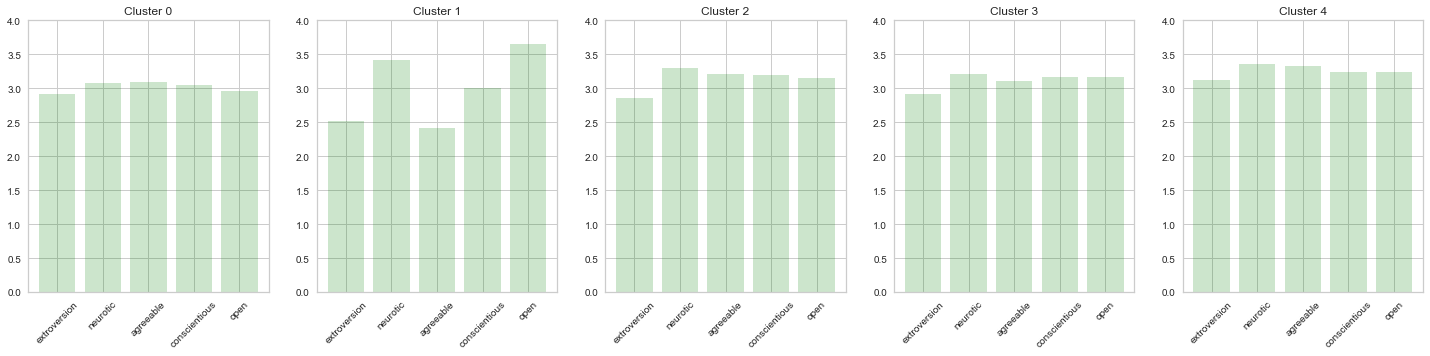

In [26]:
# Visualizing the means for each cluster
dataclusters = data_sums.groupby('clusters').mean()
plt.figure(figsize=(25,5))
for i in range(0, 5):
    plt.subplot(1,5,i+1)
    plt.bar(dataclusters.columns, dataclusters.iloc[:, i], color='green', alpha=0.2)
    #plt.plot(dataclusters.columns, dataclusters.iloc[:, i], color='red')
    plt.title('Cluster ' + str(i))
    plt.xticks(rotation=45)
    plt.ylim(0,4);

## Visualizing the Cluster Predictions

In [27]:
# In order to visualize in 2D graph I will use PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_fit = pca.fit_transform(df_model1)

df_pca = pd.DataFrame(data=pca_fit, columns=['PCA1', 'PCA2'])
df_pca['Clusters'] = predictions
df_pca.head()

,PCA1,PCA2,Clusters
0,-5.442436,-1.548011,2
1,0.525534,2.812703,3
2,-0.398051,1.972068,3
3,0.666469,0.508082,0
4,-4.480739,2.096127,2


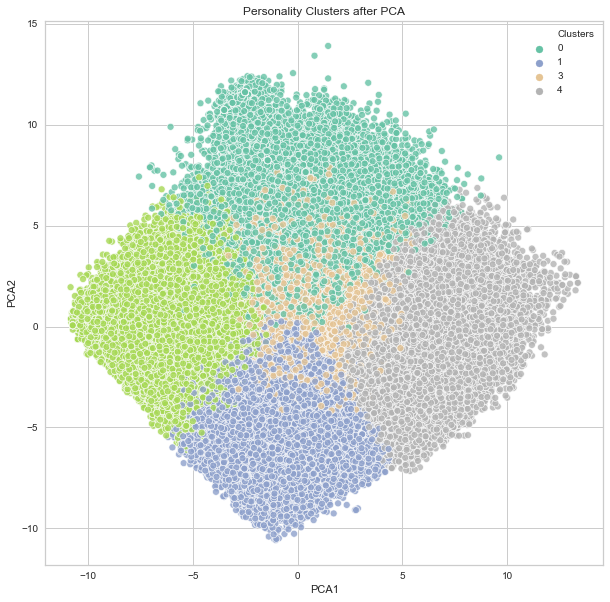

In [28]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Clusters', palette='Set2', alpha=0.8)
plt.title('Personality Clusters after PCA');

## Implementing the Model to See My Personality

I answered the questions in an Microsoft Excel spread sheet. 
Then I added that data into this notebook and put my answers to the model to see in which category I will be.

In [55]:
my_data = pd.read_excel('My_Test.xlsx')
my_data

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,4,1,4,3,5,3,5,1,5,3,1,5,1,1,3,3,4,3,1,1,3,4,3,3,1,5,1,3,5,5,5,2,5,2,5,1,3,1,3,5,4,2,5,1,4,1,5,2,3,5


In [56]:
my_personality = k_fit.predict(my_data)
print('My Personality Cluster: ', my_personality)

My Personality Cluster:  [2]


In [57]:
# Summing up the my question groups
col_list = list(my_data)
ext = col_list[0:10]
est = col_list[10:20]
agr = col_list[20:30]
csn = col_list[30:40]
opn = col_list[40:50]

my_sums = pd.DataFrame()
my_sums['extroversion'] = my_data[ext].sum(axis=1)/10
my_sums['neurotic'] = my_data[est].sum(axis=1)/10
my_sums['agreeable'] = my_data[agr].sum(axis=1)/10
my_sums['conscientious'] = my_data[csn].sum(axis=1)/10
my_sums['open'] = my_data[opn].sum(axis=1)/10
my_sums['cluster'] = my_personality
print('Sum of my question groups')
my_sums

Sum of my question groups


,extroversion,neurotic,agreeable,conscientious,open,cluster
0,3.4,2.3,3.3,3.2,3.2,2


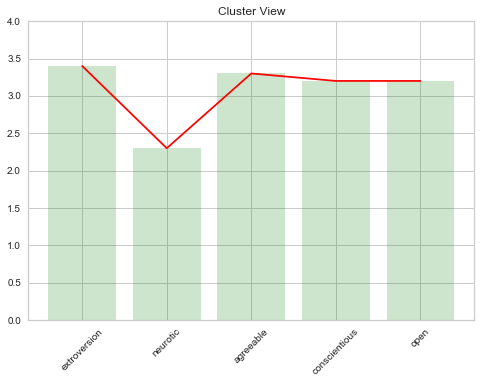

In [58]:
my_sum = my_sums.drop('cluster', axis=1)
plt.bar(my_sum.columns, my_sum.iloc[0,:], color='green', alpha=0.2)
plt.plot(my_sum.columns, my_sum.iloc[0,:], color='red')
plt.title('Cluster View')
plt.xticks(rotation=45)
plt.ylim(0,4);

You can fork my notebook and put your answers in order to see your personality too. 

Don't forget to upvote if you liked my work.